In [3]:
# Copyright (c) 2020, Pietro Vischia pietro.vischia@cern.ch

import random
from matplotlib import pyplot as plt


In [4]:
# Simulate the roll of a die

def die_roll():
    roll = random.randint(1,6) 
    return roll

# Check if a given roll is even or odd

def is_even(roll):
    if (roll % 2) == 0:
        return True
    else:
        return False


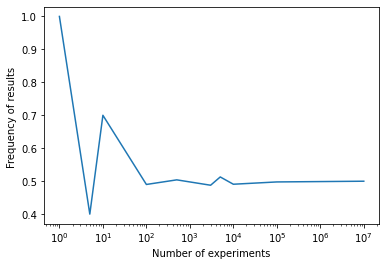

In [5]:
# Define number of experiments

N = [1, 5, 10,  100,
      500, 
     3000, 5000, 10000, 100000,  10000000]

freqs = [ 0 for n in N ]


for n in range(len(N)):
    # For each set of experiments, throw the die n times
    n_even=0
    for _ in range(N[n]):
        if is_even(die_roll()):
            n_even +=1
    freqs[n] = n_even/N[n]

# Plot the results
plt.plot(N,freqs)
plt.xlabel('Number of experiments')
plt.xscale('log')
plt.ylabel('Frequency of results ')

plt.show()


The frequency seems to stabilize after about $10^4$ iterations, but is that really so?


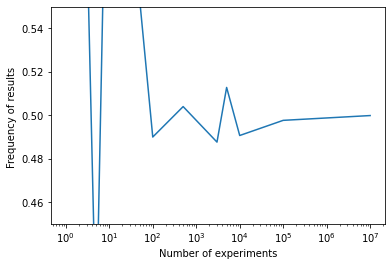

In [7]:
plt.plot(N,freqs)
plt.xlabel('Number of experiments')
plt.xscale('log')
plt.ylabel('Frequency of results ')
plt.ylim(0.45,0.55)
plt.show()


In [8]:
print('Frequency')
import pandas as pd
import numpy as np
#y= pd.DataFrame(N, freqs)
#y.columns=['Number of tosses', 'Empirical frequency']
y = pd.DataFrame({'Number of tosses': N, 'Empirical frequency': freqs, 'Deviation from expected 0.5': [ i/0.5 for i in (freqs- np.repeat([0.5], len(freqs)))]})
print(y)
#for iN, ifreq in zip(N, freqs):
#    print('R')

Frequency
   Number of tosses  Empirical frequency  Deviation from expected 0.5
0                 1             1.000000                     1.000000
1                 5             0.400000                    -0.200000
2                10             0.700000                     0.400000
3               100             0.490000                    -0.020000
4               500             0.504000                     0.008000
5              3000             0.487667                    -0.024667
6              5000             0.512800                     0.025600
7             10000             0.490700                    -0.018600
8            100000             0.497670                    -0.004660
9          10000000             0.499872                    -0.000256


(-0.01, 0.01)

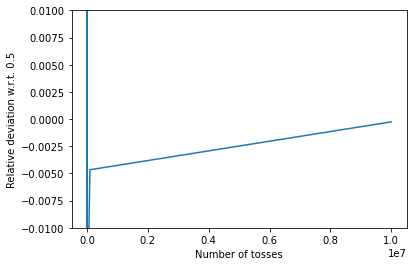

In [9]:
plt.plot(y['Number of tosses'], y['Deviation from expected 0.5'])
plt.ylabel('Relative deviation w.r.t. 0.5')
plt.xlabel('Number of tosses')
plt.ylim(-0.01,0.01)